In [1]:
import rasterio
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_path = "/Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/Vh_log10.tif"
## Now plot the reprojected data
#with rasterio.open(file_path) as src:
   # fig, ax = plt.subplots(figsize=(10, 10))
   # ax.imshow(src.read(1), cmap='gray')  # Plot the first band
   # ax.axis('off')  # Hide the axes
   # plt.show()

In [3]:
# Open the raster file outside of the 'with' block to keep it open
src = rasterio.open(file_path)

# Print metadata to check the number of bands
print(src.meta)

# Get the transform and CRS from the metadata
transform = src.transform  # Affine transform

# Get the number of bands
num_bands = src.count

data = src.read(1)

# Create a figure to hold the subplots
if num_bands == 1:
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(src.read(1), cmap='gray')  # Plot the single band
    ax.set_title('Band 1')
    ax.axis('off')  # Hide the axes

RasterioIOError: '/Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/Vh_log10.tif' not recognized as a supported file format.

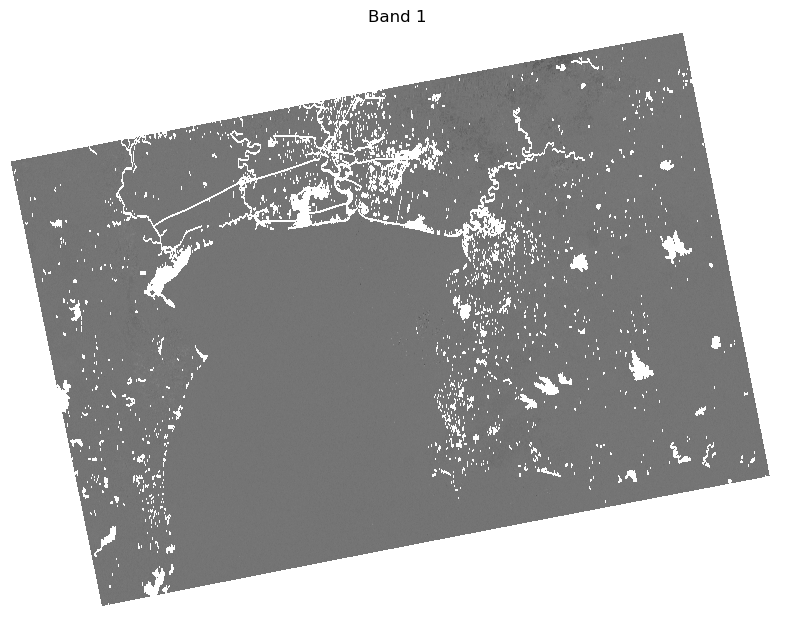

In [14]:
# Get the no-data value from the raster metadata (if available)
nodata_value = src.nodata

# Replace no-data value with NaN
if nodata_value is not None:
    data = np.where(data == nodata_value, np.nan, data)

# Find the minima and maxima of the data (ignoring NaNs)
min_value = np.nanmin(data)
max_value = np.nanmax(data)

# Print the minima and maxima values
#print(f"Min value: {min_value}")
#print(f"Max value: {max_value}")

# Plot the image, ignoring NaNs
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(data, cmap='gray')  # Plot the data, now with NaNs removed
ax.set_title('Band 1')
ax.axis('off')  # Hide the axes
plt.show()

In [2]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.features import geometry_mask
import cartopy.crs as ccrs
import cartopy.feature as cfeature

transform=src.transform

NameError: name 'src' is not defined

In [8]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.features import geometry_mask
import cartopy.crs as ccrs
import cartopy.feature as cfeature

transform=src.transform
height, width = src.height, src.width

# Define the extent of the raster (bounding box)
lon_min, lat_max = transform * (0, 0)  # top-left corner
lon_max, lat_min = transform * (width, height)  # bottom-right corner
extent = [lon_min, lon_max, lat_min, lat_max]

# Load the shapefile
shapefile_path = '/Users/lb962/Documents/GitHub/MyanmarEQ2025/traffy_processing/traffy_data_2/thailand-latest-free.shp/gis_osm_water_a_free_1.shx'
gdf = gpd.read_file(shapefile_path)

In [ ]:
#src = rasterio.open(file_path)

In [15]:
from rasterio.mask import mask

gdf = gdf.to_crs(src.crs)

# Step 3: Convert the geometries from the GDF to the format required by rasterio (list of dicts)
geoms = [geom.__geo_interface__ for geom in gdf.geometry]

mask = geometry_mask(geoms, transform=src.transform, invert=True, out_shape=src.shape)
# Step 5: Apply the mask to the raster data, setting values inside polygons to zero
data[mask] = np.nan

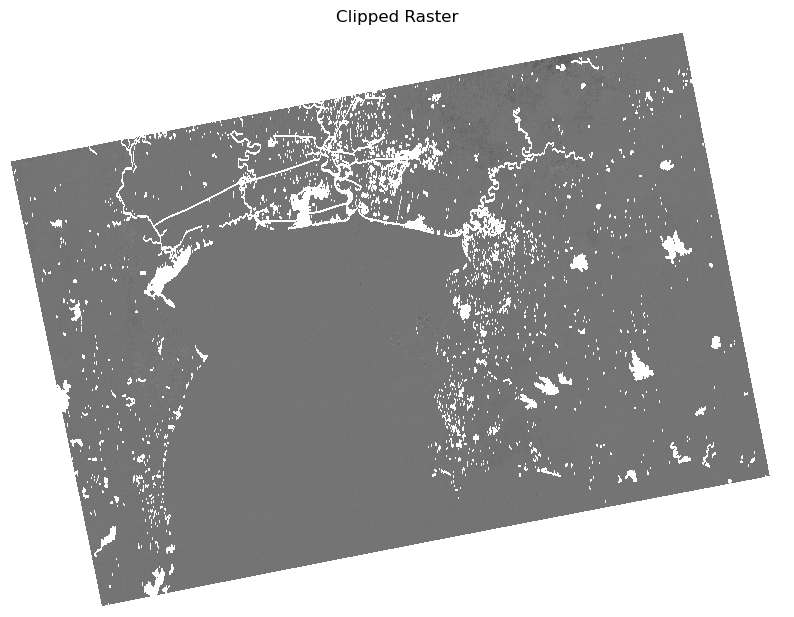

In [16]:
# Step 5: Plot the image, ignoring NaNs
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(data, cmap='gray')  # Plot the first band of the clipped image
ax.set_title('Clipped Raster')
ax.axis('off')  # Hide the axes
plt.show()

In [17]:
dewatered_data = data

In [18]:
thai_bound = "/Users/lb962/Documents/GitHub/MyanmarEQ2025/stat_analysis/data/tha_admbnda_adm0_rtsd_20190221 2/tha_admbnda_adm0_rtsd_20190221.shp"

gdf_bound = gpd.read_file(thai_bound)
gdf_bound = gdf_bound.to_crs(src.crs)

# Step 3: Convert the geometries from the GDF to the format required by rasterio (list of dicts)
geoms_bound = [geom.__geo_interface__ for geom in gdf_bound .geometry]
mask = geometry_mask(geoms_bound, transform=src.transform, invert=False, out_shape=src.shape)
# Step 5: Apply the mask to the raster data, setting values inside polygons to zero
dewatered_data[mask] = np.nan

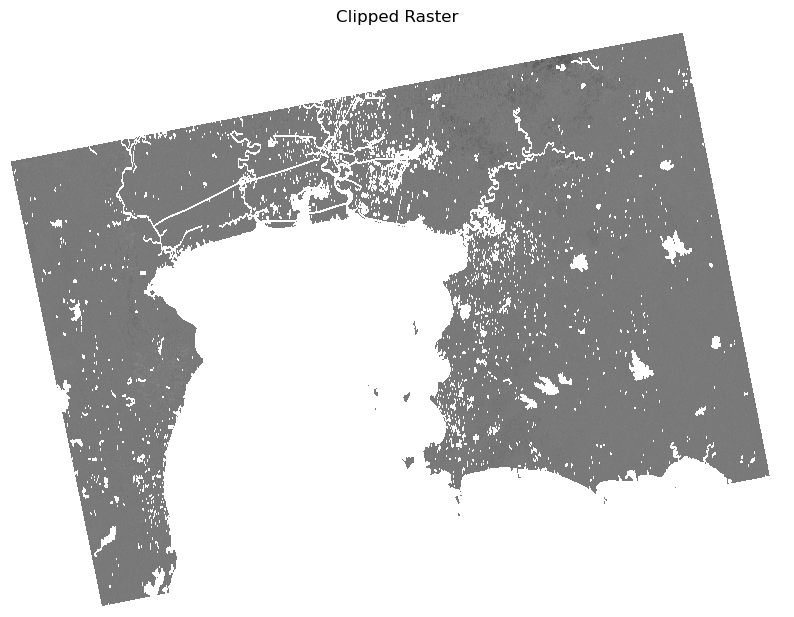

In [19]:
# Step 5: Plot the image, ignoring NaNs
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(dewatered_data, cmap='gray')  # Plot the first band of the clipped image
ax.set_title('Clipped Raster')
ax.axis('off')  # Hide the axes
plt.show()

In [20]:
# Take the absolute value of the dewatered_data
dewatered_data_abs = np.abs(dewatered_data)

In [111]:
from cv2 import bilateralFilter
from scipy.ndimage import median_filter

filtered_data = median_filter(dewatered_data_abs, size=3)

NameError: name 'dewatered_data_abs' is not defined

In [110]:
if filtered_data.ndim == 2:
    # Plot the smoothed data
    plt.figure(figsize=(10, 8))
    plt.imshow(filtered_data , cmap='viridis', origin='upper', vmin = 0.1, vmax = 0.4)
    plt.colorbar(label='Smoothed Values')
    plt.title('Smoothed Raster Data')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()

NameError: name 'filtered_data' is not defined

In [23]:
from scipy.ndimage import gaussian_filter, laplace, label
sigma = 1  # Small sigma for preserving small structures
sigma_for_smoothing = 3 # Larger sigma for general smoothing
laplacian_strength = 2  # Strength of Laplacian edge detection
edge_threshold = 0.3  # Lower threshold to catch small edges
min_structure_size = 2  # Minimum size of the structure to keep (in pixels)

In [ ]:
# Apply Gaussian smoothing to reduce noise
smoothed_data = gaussian_filter(filtered_data, sigma=sigma_for_smoothing)

In [95]:

# Apply Laplacian edge detection
edges = laplace(smoothed_data)

# Create a mask for significant edges
edge_mask = np.abs(edges) > edge_threshold  # Mask where Laplacian is significant

# Label connected components (find small structures in the mask)
labeled, num_labels = label(edge_mask)

# Identify and keep small connected structures
small_structures_mask = np.zeros_like(labeled, dtype=bool)
for i in range(1, num_labels + 1):
    structure_size = np.sum(labeled == i)
    if structure_size <= min_structure_size:
        small_structures_mask[labeled == i] = True  # Keep structures that are small

# Amplify edges only for small structures
stronger_edges = np.zeros_like(edges)
stronger_edges[small_structures_mask] = laplacian_strength * edges[small_structures_mask]

# Combine the smoothed data with the amplified edges to preserve fine details
# Sharpening the image by adding back the stronger edges
sharpened_data = smoothed_data - 0.5 * stronger_edges

# Optional: Apply another small Gaussian filter to fine-tune the result
sharpened_data = gaussian_filter(sharpened_data, sigma=sigma)


In [34]:
if smoothed_data.ndim == 2:
    # Plot the smoothed data
    plt.figure(figsize=(10, 8))
    plt.imshow(sharpened_data, cmap='viridis', origin='upper',  vmin=0.0, vmax = 0.3)
    plt.colorbar(label='Smoothed Values')
    plt.title('Smoothed Raster Data')
    plt.xlabel('Column Index')
    plt.ylabel('Row Index')
    plt.show()

NameError: name 'smoothed_data' is not defined

In [67]:
# Define coordinates for Bangkok
lat_bangkok = 13.75
lon_bangkok = 100.5167

# Assuming you have the `src` object for your raster data
# Extract the transformation and the raster's bounding box (extent)
transform = src.transform  # src is your rasterio dataset
width = src.width
height = src.height

# Convert lat/lon to pixel coordinates (row, col)
# In the case of a raster's affine transform, this is done as:
col_bangkok, row_bangkok = ~transform * (lon_bangkok, lat_bangkok)

# Convert to integer coordinates
col_bangkok = int(col_bangkok)
row_bangkok = int(row_bangkok)

# Define the zoom window around Bangkok (you can adjust this size based on how much of the area you want to show)
window_size = 500

# Define the bounds of the zoom window
row_min = max(0, row_bangkok - window_size)
row_max = min(height, row_bangkok + window_size)
col_min = max(0, col_bangkok - window_size)
col_max = min(width, col_bangkok + window_size)

# Slice the zoomed-in data based on the window
#zoomed_data = filtered_data_median[row_min:row_max, col_min:col_max]
zoomed_data = sharpened_data[row_min:row_max, col_min:col_max]

# Plot the zoomed-in data
plt.figure(figsize=(10, 8))
plt.imshow(zoomed_data, cmap='viridis', origin='upper', vmin=0.14, vmax=0.20)
plt.colorbar(label='Filtered Values')
plt.title('Zoomed-in Median Filtered Raster Data (Bangkok)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

NameError: name 'sharpened_data' is not defined

# process

In [41]:
file_path = "processed_buildings.tif"
# Open the raster file outside of the 'with' block to keep it open
src = rasterio.open(file_path)
processed_data= src.read(1)

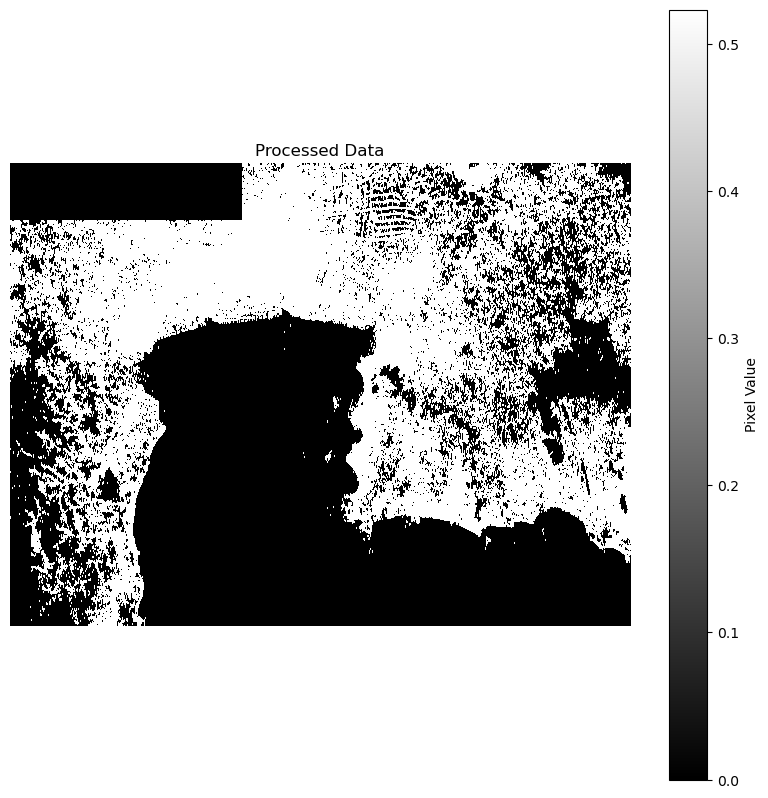

In [42]:
import matplotlib.pyplot as plt

# Plot the processed_data array
plt.figure(figsize=(10, 10))
plt.imshow(processed_data, cmap='gray', origin='upper')
plt.title('Processed Data')
plt.colorbar(label='Pixel Value')
plt.axis('off')  # Optional: hides axis ticks
plt.show()

In [43]:
with rasterio.open(file_path) as src:
    print("Original CRS:", src.crs)
    print("Bounds:", src.bounds)


Original CRS: None
Bounds: BoundingBox(left=99.43437, bottom=12.20728, right=102.06173, top=14.16526)


In [44]:
import rasterio
from rasterio.enums import Resampling

file_path = "processed_buildings.tif"
output_file_path = "fixed_buildings.tif"

with rasterio.open(file_path) as src:
    data = src.read(1)  # Read the first band
    transform = src.transform
    width = src.width
    height = src.height

    # Build a new profile from scratch to avoid copying over broken metadata
    new_profile = {
        'driver': 'GTiff',
        'dtype': data.dtype,
        'count': 1,
        'width': width,
        'height': height,
        'crs': 'EPSG:4326',
        'transform': transform,
        'compress': 'lzw'  # Optional compression
    }

    with rasterio.open(output_file_path, 'w', **new_profile) as dst:
        dst.write(data, 1)

print(f"✅ Clean, georeferenced file saved as: {output_file_path}")

✅ Clean, georeferenced file saved as: fixed_buildings.tif


In [3]:
file_path = "fixed_buildings.tif"
# Open the raster file outside of the 'with' block to keep it open
src = rasterio.open(file_path)
processed_data= src.read(1)

In [4]:
# Set values below 0.11 to nan
processed_data[processed_data < 0.2] = np.nan

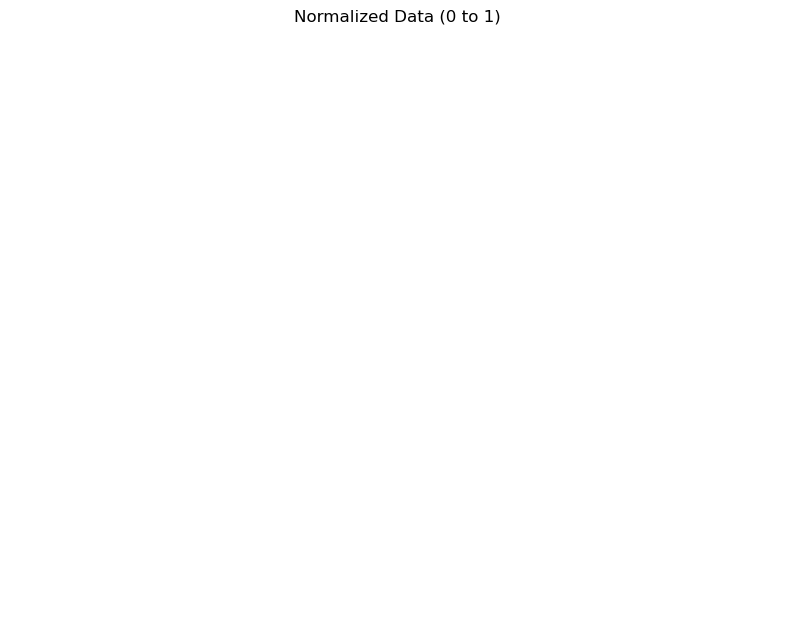

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Find min and max values
min_value = np.nanmin(processed_data)
max_value = np.nanmax(processed_data)

# Step 2: Normalize the data
normalized_data = (processed_data - min_value) / (max_value - min_value)

# Step 3: Plot the normalized data
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(normalized_data, cmap='viridis')
ax.set_title('Normalized Data (0 to 1)')
ax.axis('off')  # Hide the axes
plt.show()

In [48]:
import rasterio
from rasterio.crs import CRS

output_file_path = "/Users/lb962/Documents/GitHub/MyanmarEQ2025/results_normalised/normalized_pair1_buildings_normalized.tif"

# Open the original file (src) to retrieve metadata
with rasterio.open(file_path) as src:
    # Get the profile (metadata) from the original file
    profile = src.profile
    
    # Update the profile with the necessary information
    profile.update(dtype=rasterio.float32, count=1)  # Assuming single-band image with float32 dtype
    
    # Create a new file and write the normalized data
    with rasterio.open(output_file_path, 'w', **profile) as dst:
        dst.write(normalized_data, 1)  # Write band 1 (the normalized data)

print(f"Normalized data saved with CRS and metadata at: {output_file_path}")


Normalized data saved with CRS and metadata at: /Users/lb962/Documents/GitHub/MyanmarEQ2025/results_normalised/normalized_pair1_buildings_normalized.tif


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
def normalize_array(arr):
    norm_arr = (arr - np.nanmin(arr)) / (np.nanmax(arr) - np.nanmin(arr))
    return norm_arr

data = np.nan_to_num(data, 0)

# Flatten the 2D array to 1D for scaler
flat_data = data.astype('float32').flatten()

# Handle NaNs (optional: remove them or replace them)
flat_data_no_nan = np.nan_to_num(flat_data, nan=0.0)

# Reshape to 2D as required by scaler
reshaped = flat_data_no_nan.reshape(-1, 1)

# Apply scaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(reshaped)

# Reshape back to original raster shape
normalized_data = scaled.reshape(data.shape)


NameError: name 'data' is not defined

In [ ]:
normalized_data = normalize_array(normalized_data )

In [23]:
# Optional: Write the normalized data back to a new file
normalized_file_path = "/Users/lb962/Documents/GitHub/MyanmarEQ2025/results_tif/normalized_pair20_buildings.tif"
profile = src.profile
profile.update(dtype=rasterio.float32)

with rasterio.open(normalized_file_path, 'w', **profile) as dst:
    dst.write(normalized_data.astype(rasterio.float32), 1)

In [7]:
np.nanmax(normalized_data)

1.0

In [6]:
np.nanmin(normalized_data)

0.0

In [9]:
# Load the shapefile
shapefile_path = '/Users/lb962/Documents/GitHub/MyanmarEQ2025/traffy_processing/traffy_data_2/thailand-latest-free.shp/gis_osm_water_a_free_1.shx'
gdf = gpd.read_file(shapefile_path)

from rasterio.mask import mask

# Step 3: Convert the geometries from the GDF to the format required by rasterio (list of dicts)
geoms = [geom.__geo_interface__ for geom in gdf.geometry]

mask = geometry_mask(geoms, transform=src.transform, invert=True, out_shape=src.shape)
# Step 5: Apply the mask to the raster data, setting values inside polygons to zero
processed_data[mask] = np.nan

In [15]:
processed_data = processed_data
# Set values below 0.11 to nan
processed_data[processed_data < 0.15] = np.nan

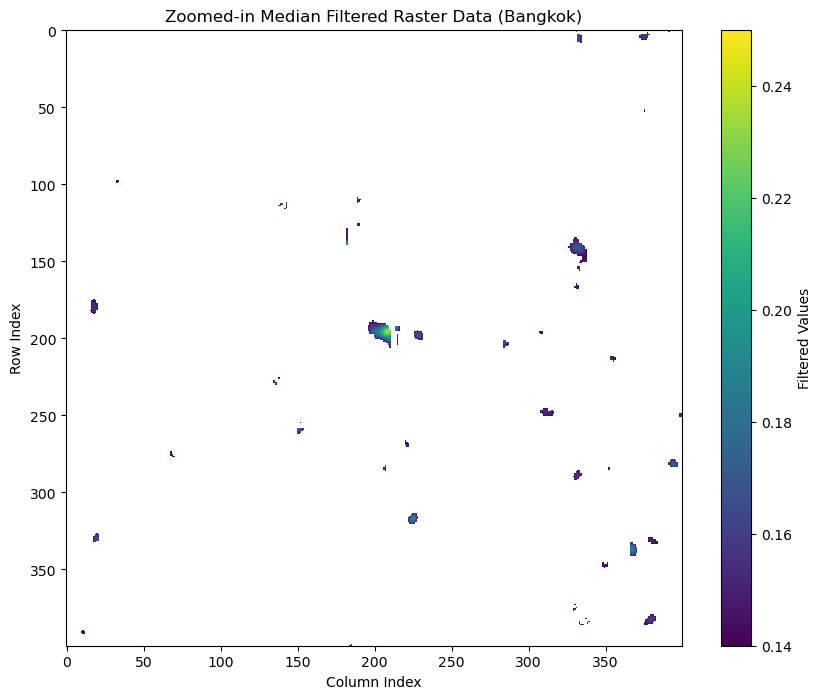

In [12]:
# Define coordinates for Bangkok
lat_bangkok =  13.80222
lon_bangkok = 100.54722

# Assuming you have the `src` object for your raster data
# Extract the transformation and the raster's bounding box (extent)0
transform = src.transform  # src is your rasterio dataset
width = src.width
height = src.height

# Convert lat/lon to pixel coordinates (row, col)
# In the case of a raster's affine transform, this is done as:
col_bangkok, row_bangkok = ~transform * (lon_bangkok, lat_bangkok)

# Convert to integer coordinates
col_bangkok = int(col_bangkok)
row_bangkok = int(row_bangkok)

# Define the zoom window around Bangkok (you can adjust this size based on how much of the area you want to show)
window_size = 200

# Define the bounds of the zoom window
row_min = max(0, row_bangkok - window_size)
row_max = min(height, row_bangkok + window_size)
col_min = max(0, col_bangkok - window_size)
col_max = min(width, col_bangkok + window_size)

# Slice the zoomed-in data based on the window
#zoomed_data = filtered_data_median[row_min:row_max, col_min:col_max]
zoomed_data = processed_data[row_min:row_max, col_min:col_max]

# Plot the zoomed-in data
plt.figure(figsize=(10, 8))
plt.imshow(zoomed_data, cmap='viridis', origin='upper', vmin=0.14, vmax=0.25)
plt.colorbar(label='Filtered Values')
plt.title('Zoomed-in Median Filtered Raster Data (Bangkok)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [8]:
#gdf_building = gpd.read_file('output_polygons.shp')
gdf_building = gpd.read_file('/Users/lb962/Downloads/01_JD_bldg_with_admin_filtered/01_JD_bldg_with_admin_filtered.shp')

In [10]:
raster_crs = src.crs
transform = src.transform

In [11]:
import rasterstats as rs
# Use zonal stats to calculate mean for each polygon in the shapefile
zonal_stats = rs.zonal_stats(gdf_building, normalized_data, affine=transform, stats="mean")

# Convert zonal stats to a GeoDataFrame
gdf_building['build_mean_norm'] = [stat['mean'] for stat in zonal_stats]

KeyboardInterrupt: 

In [ ]:
gdf_building['build_mean_norm'] = gdf_building['build_mean_norm'].fillna(0)

In [ ]:
# Min-Max normalization (scaling to [0, 1])
#gdf_building['Lisanne_normalized_mean_value'] = (gdf_building['Lisanne_mean_value'] - gdf_building['Lisanne_mean_value'].min()) / (gdf_building['Lisanne_mean_value'].max() - gdf_building['Lisanne_mean_value'].min())

# no

IndexError: index 0 is out of bounds for axis 0 with size 0

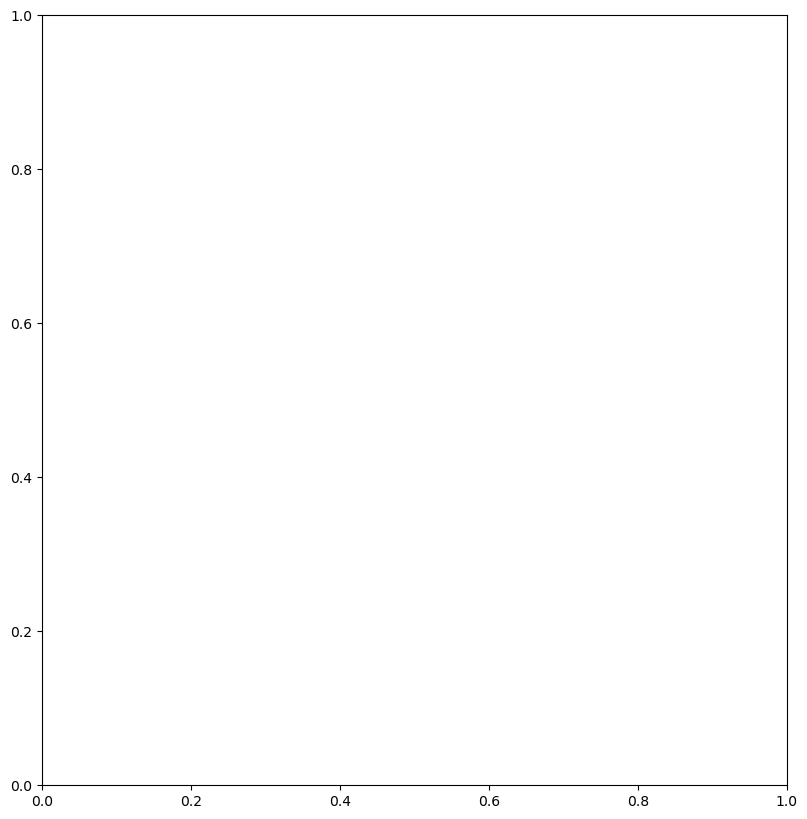

In [19]:
import matplotlib.pyplot as plt

# Min-Max normalization (scaling to [0, 1])
gdf_building['Lisanne_normalized_mean_value'] = (gdf_building['Lisanne_mean_value'] - gdf_building['Lisanne_mean_value'].min()) / (gdf_building['Lisanne_mean_value'].max() - gdf_building['Lisanne_mean_value'].min())

# Now, you can plot the polygons again, using the normalized values
fig, ax = plt.subplots(figsize=(10, 10))

# Use the 'normalized_mean_value' column for coloring
gdf_building.plot(ax=ax, column='Lisanne_normalized_mean_value', cmap='viridis', legend=True,
                  legend_kwds={'label': "Normalized Mean Value", 'orientation': "horizontal"})

# Set the zoom limits for the plot (lat/lon range)
ax.set_xlim(100.5, 100.6)   # Longitude range
ax.set_ylim(13.8, 13.9)  # Latitude range

# Optional: Add a title or customize the plot
plt.title("Polygons Colored by Normalized Mean Value")

# Show the plot
plt.show()

In [ ]:
import pandas as pd
# Define new bins and labels
bins = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['0–0.25', '0.25–0.5', '0.5–0.75', '0.75–1.0']

# Apply pd.cut to bin the 'normalized' column
gdf_building['binned'] = pd.cut(gdf_building['build_mean_norm'], bins=bins, labels=labels, include_lowest=True)

# Count the number of buildings in each bin
bin_counts = gdf_building['binned'].value_counts().sort_index()

# Also update bin labels in the original dataframe (if needed)
gdf_building['bin_label'] = gdf_building['binned']

In [ ]:

# Convert the 'bin_label' column to string type
gdf_building['bin_label'] = gdf_building['bin_label'].astype(str)
# Convert the 'bin_label' column to string type
gdf_building['binned'] = gdf_building['binned'].astype(str)

In [ ]:
# Save the GeoDataFrame to a shapefile or other vector format
gdf_building.to_file('/Users/lb962/Documents/GitHub/MyanmarEQ2025/results_normalised/Bdg_buildings/pair1_damaged_output_binned.shp')

In [129]:
import rasterio

output_path = '/Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/pair1/pair1_processed_buildings.tif'

# Save raster directly
dst = rasterio.open(
    output_path,
    "w",  
    driver="GTiff",
    height=processed_data.shape[0],  
    width=processed_data.shape[1],   
    count=1,  
    dtype=processed_data.dtype,  
   # crs="EPSG:3857",  
    transform=transform,  
    nodata=0  
)
dst.write(processed_data, 1)  
dst.close()  # Close file

print(f"Saved raster: {output_path}")

Saved raster: /Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/pair1/pair1_processed_buildings.tif


In [105]:
import rasterio
import geopandas as gpd
from rasterio import features
import numpy as np
from shapely.geometry import shape
import pandas as pd

In [106]:
bangkok_buldings = pd.read('/Users/lb962/Documents/GitHub/MyanmarEQ2025/traffy_processing/traffy_data_2/thailand-latest-free.shp/gis_osm_buildings_a_free_1.shp')

AttributeError: module 'pandas' has no attribute 'read'

In [102]:
import rasterio
import geopandas as gpd
from rasterio import features
import numpy as np
from shapely.geometry import shape

file_path = "/Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/01_pair01_bldg_height_clipped.tif"

with rasterio.open(file_path) as building_src:
    # Read the raster data
    building_data = building_src.read(1)  # Assuming we're working with the first band
    # Define a threshold value (adjust according to your needs)
    threshold_value = 0.1  # Only consider values above this threshold
    # Apply threshold (binary mask for pixels above threshold)
    mask = building_data > threshold_value

    # Use rasterio.features.shapes to extract polygons from the mask
    shapes = features.shapes(mask.astype(np.int32), mask=mask, transform=building_src.transform)

    # Convert the shapes to a list of polygons directly into a GeoDataFrame
    polygons = [shape(polygon) for polygon, value in shapes]

# Create a GeoDataFrame directly without a for loop
filled_gdf = gpd.GeoDataFrame(geometry=polygons)

# Set the CRS (Coordinate Reference System) of the GeoDataFrame to match the raster's CRS
filled_gdf.set_crs(building_src.crs, allow_override=True, inplace=True)

# Save the GeoDataFrame to a shapefile or other vector format (optional)
filled_gdf.to_file('output_polygons.shp')

# Optionally: Plot the polygons
filled_gdf.plot()

RasterioIOError: '/Users/lb962/Library/CloudStorage/OneDrive-UniversityofCambridge/01_pair01_bldg_height_clipped.tif' not recognized as a supported file format.

In [59]:
from rasterstats import zonal_stats
import numpy as np
import geopandas as gpd

In [61]:
# Generate zonal statistics: mean of raster under each polygon
stats = zonal_stats(
    gdf_building,
    processed_data,
    affine=src.transform,
    nodata=np.nan,
    stats=['mean'],
    all_touched=True  # include pixels touched by polygon edge
)

# Extract mean values and handle missing (None) -> set to 0
mean_values = [s['mean'] if s['mean'] is not None else 0 for s in stats]

# Assign to GeoDataFrame
gdf_building['mean_damage'] = mean_values

In [58]:
len(gdf_building)

1145260

<Axes: >

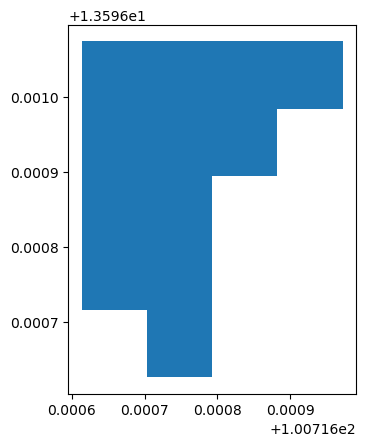

In [57]:
# Plot only the first 2 polygons
gdf_building.iloc[[490133]].plot()

In [8]:
gdf_building = gpd.read_file('output_polygons.shp')

In [18]:
# Use rasterio.features.shapes to get polygons from the overlayed data
results = shapes(overlay_data, mask=building_mask, transform=building_transform)

# Prepare to store the polygons and their mean values
polygons = []
mean_values = []

for geom, value in results:
    if value > 0:  # We ignore empty polygons (value 0)
        # Convert the geometry from raster shapes to shapely polygons
        polygon = shape(geom)
        polygons.append(polygon)
        mean_values.append(value)

# If no polygons are found with non-zero values, assign zero to them
if len(polygons) == 0:
    mean_values = [0]


NameError: name 'shapes' is not defined

In [9]:
transform = src.transform

In [20]:
from rasterio.mask import mask
from rasterio.features import geometry_mask

# Ensure the GeoDataFrame has the same CRS as the raster
#gdf_building = gdf_building.to_crs(src.crs)

# Convert the geometries to the format required by rasterio (list of dicts)
geoms = [geom.__geo_interface__ for geom in gdf_building.geometry]

# Create a mask where True = Outside the buildings, False = Inside
mask = geometry_mask(geoms, transform=transform , invert=False, out_shape=processed_data.shape)

# Apply the mask:
# - Values inside polygons remain unchanged
# - Values outside polygons are set to zero
processed_data[mask] = 0  # Set outside values to zero

In [21]:
processed_data[mask] = np.nan

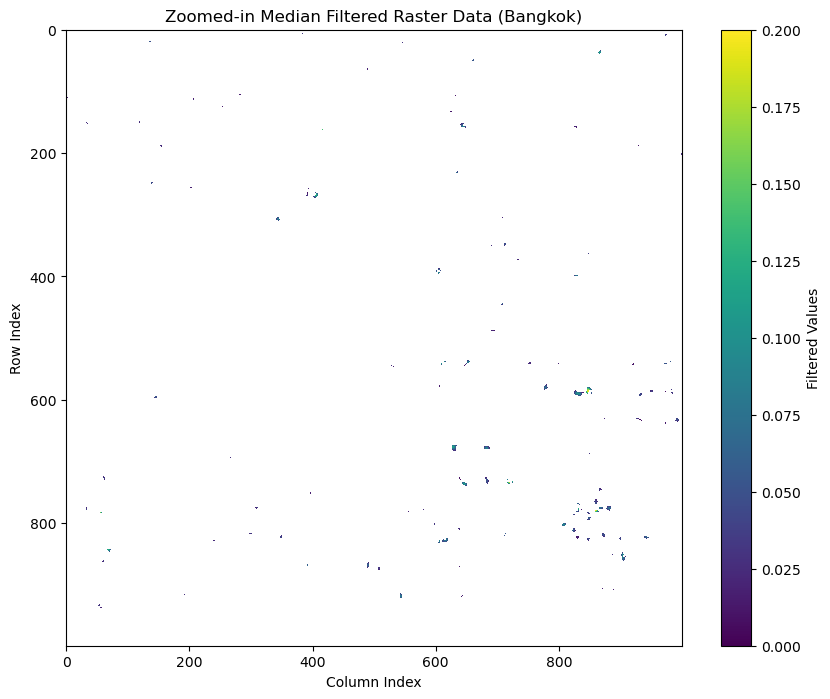

In [33]:
# Define coordinates for Bangkok
lat_bangkok = 13.75
lon_bangkok = 100.5167

# Assuming you have the `src` object for your raster data
# Extract the transformation and the raster's bounding box (extent)
transform = src.transform  # src is your rasterio dataset
width = src.width
height = src.height

# Convert lat/lon to pixel coordinates (row, col)
# In the case of a raster's affine transform, this is done as:
col_bangkok, row_bangkok = ~transform * (lon_bangkok, lat_bangkok)

# Convert to integer coordinates
col_bangkok = int(col_bangkok)
row_bangkok = int(row_bangkok)

# Define the zoom window around Bangkok (you can adjust this size based on how much of the area you want to show)
window_size = 500

# Define the bounds of the zoom window
row_min = max(0, row_bangkok - window_size)
row_max = min(height, row_bangkok + window_size)
col_min = max(0, col_bangkok - window_size)
col_max = min(width, col_bangkok + window_size)

# Slice the zoomed-in data based on the window
#zoomed_data = filtered_data_median[row_min:row_max, col_min:col_max]
zoomed_data = normalized_damage[row_min:row_max, col_min:col_max]

# Plot the zoomed-in data
plt.figure(figsize=(10, 8))
plt.imshow(zoomed_data, cmap='viridis', origin='upper', vmin=0, vmax=.2)
plt.colorbar(label='Filtered Values')
plt.title('Zoomed-in Median Filtered Raster Data (Bangkok)')
plt.xlabel('Column Index')
plt.ylabel('Row Index')
plt.show()

In [ ]:
# Add the mean pixel values to the GeoDataFrame
gdf_building['mean_value'] = mean_values

# Normalize the mean values to a 0–1 range using min-max normalization
min_val = gdf_building['mean_value'].min()
max_val = gdf_building['mean_value'].max()

# Perform the normalization
gdf_building['mean_value_norm'] = (
    (gdf_building['mean_value'] - min_val) / (max_val - min_val)
    if max_val != min_val
    else 0.0
)

In [ ]:
gdf_building.to_file('pair1_gdf_building_mean_normalized.shp')

In [23]:
# Step 2: Normalize the damage values from 0 to 1
min_value = np.nanmin(processed_data)  # Find the minimum value, ignoring NaNs
max_value = np.nanmax(processed_data)  # Find the maximum value, ignoring NaNs
    
    # Normalize the data
normalized_damage = (processed_data - min_value) / (max_value - min_value)

In [35]:
import rasterio

output_path = "pair1_normalised_processed_buildings.tif"  # Output file name

# Save raster directly
dst = rasterio.open(
    output_path,
    "w",  
    driver="GTiff",
    height=normalized_damage.shape[0],  
    width=normalized_damage.shape[1],   
    count=1,  
    dtype=normalized_damage.dtype,  
   # crs="EPSG:3857",  
    transform=transform,  
    nodata=0  
)
dst.write(normalized_damage, 1)  
dst.close()  # Close file

print(f"Saved raster: {output_path}")

Saved raster: pair1_normalised_processed_buildings.tif


In [ ]:
processed_data

In [106]:
import rasterio

output_path = "processed_buildings.tif"  # Output file name

# Save raster directly
dst = rasterio.open(
    output_path,
    "w",  
    driver="GTiff",
    height=processed_data.shape[0],  
    width=processed_data.shape[1],   
    count=1,  
    dtype=processed_data.dtype,  
   # crs="EPSG:3857",  
    transform=transform,  
    nodata=0  
)
dst.write(processed_data, 1)  
dst.close()  # Close file

print(f"Saved raster: {output_path}")

Saved raster: processed_buildings.tif
